<h2>Indice</h2>
<ol style = "font-size:20px">
    <li><a href= #Ideas>Ideas</a></li>
    <li><a href =#-Analisis-de-categorias->Análisis de categorias</a></li>
     <li><a href =#Analisis-de-tamano>Análisis de tamaño</a></li>
</ol>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from decorator import decorator
import re 

In [3]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df_user = pd.read_csv("googleplaystore_user_reviews.csv")
df_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [30]:
@decorator
def deco(fun,*args):
    print("------------------------------------")
    fun(args[0], args[1])
    print("------------------------------------")
@deco
def basic_info(name, df):
    print(name)
    print(df.columns)
    print(df.shape)

In [31]:
basic_info("Dataset app", df)
basic_info("Dataset usuario", df_user)

------------------------------------
Dataset app
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
(10841, 13)
------------------------------------
------------------------------------
Dataset usuario
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
(64295, 5)
------------------------------------


In [33]:
len(df_user["App"].unique())

1074

<h2>Ideas</h2>
<a href = #Indice>Regresar al indice</a>

#### Algunas ideas
Inicialmente quiero considerar que una app es exitosa dependiendo del <b>rating</b> obtenido y la cantidad de <b>descargas</b>. Por lo tanto, ambas seran mis variables objetivo en el análisis.
A continuacion planteo mis ideas iniciales con la observacion de la estructura del dataset.
- El genero, el peso y el precio de la app influye en el exito de las descargas
- Posiblemente el titulo de la aplicaciones tambien tenga cierta importancia
- Es complicado hacer un analisis total debido a que variables como el diseño de la app, el marketing realizado, entre otras cosas no se tienen en el actual dataset


In [43]:
categoria = df["Category"].unique()
print(categoria)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [44]:
df.loc[df["Category"]=="1.9", :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [48]:
df.drop(10472,axis = 0, inplace=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<h2> Analisis de categorias </h2> 
<a href = #Indice>Regresar al indice</a>


In [66]:
rating = df.groupby("Category").mean()
rating.sort_values("Rating" ,ascending = False)

,Rating
Category,
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571
HEALTH_AND_FITNESS,4.277104


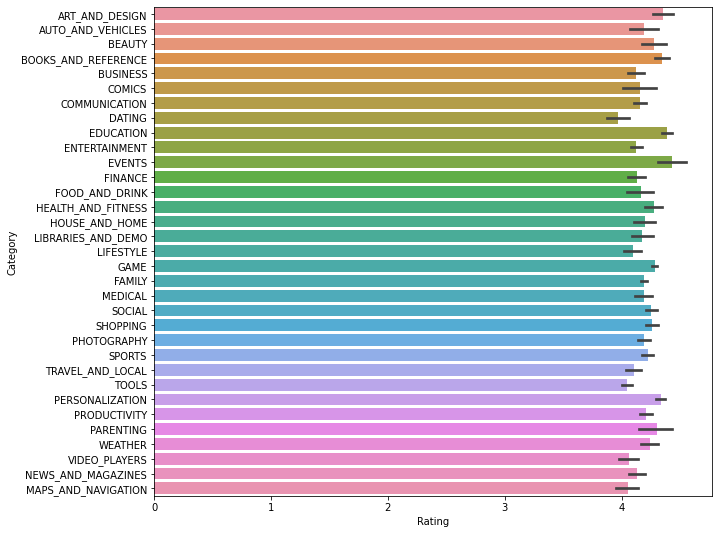

In [69]:
ax, f = plt.subplots(figsize = (10,9))
sns.barplot(x = "Rating" , y = "Category" , data=df )

In [76]:
df["Installs"].dtype

dtype('O')

In [86]:
df["Installs"][0].replace(",", "").replace("+","")

'10000'

In [105]:
def clean_installs(row):
    return row.replace(",", "").replace("+","")

In [110]:
new = df["Installs"].apply(clean_installs)
new = new.astype('int32')
df["Installs"] = new

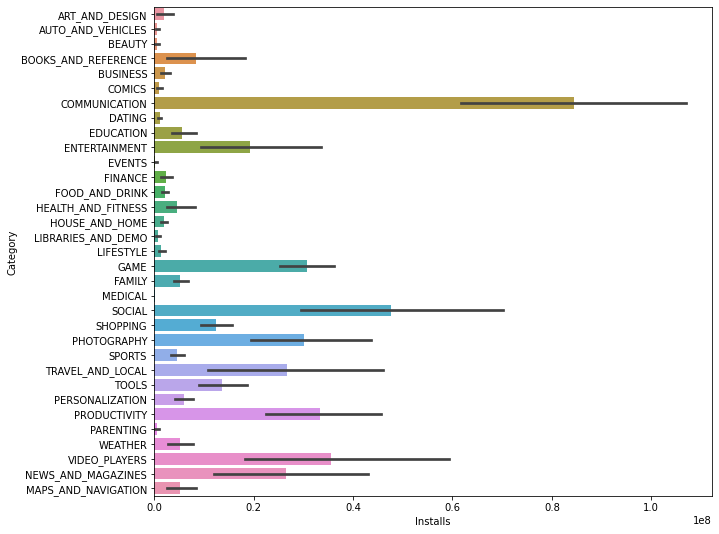

In [112]:
ax, f = plt.subplots(figsize = (10,9))
sns.barplot(x = "Installs" , y = "Category" , data=df )

<h3>Conclusiones</h3>
Al parecer no existe una gran relacion entre el rating y las categorias debido a que no hay una gran diferencia entre cada una de las categorias en  promedio. Sin embargo, parece haber una gran importancia entre las categorias y la cantidad de descargas de la app. Creo que esto se debe a la cantidad de publico que necesita ciertas categorias,por ejemplo, las personas de todas las edades usan las redes sociales, sin embargo, no todos buscan citas, o app de productividad. A pesar de esto hay que poner atencion al tamaño de los intervalos de confianza.

<h2>Analisis de tamano</h2>
<a href = #Indice>Regresar al indice</a>

In [186]:
pattern = r"[0-9]+(.)?[0-9]*(M)?"
def clean_size(row):
    if re.search(pattern, row):
        if "M" in row:
            return row.replace("M","")
        else:
            return "1"
    else:
        return "NA"
new_size = df["Size"].apply(clean_size)

In [187]:
df["Size"] = new_size

In [189]:
df.loc[df["Size"] == "1", :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,1,100000,Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,1,100000,Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,1,10000000,Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,1,1000000,Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,1,10000000,Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10763,FP Разбитый дисплей,FAMILY,4.5,922,1,50000,Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10764,FP Transportation,AUTO_AND_VEHICLES,NaN,1,1,1,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,0,1,50,Paid,$1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up
10832,FR Tides,WEATHER,3.8,1195,1,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [ ]:
ax, f = plt.subplots(figsize = 10,10)
sns.barplot(x = "size", y = "Category", data = df)